In [5]:
#librerias

import random as r
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Punto 1

In [41]:
#baraja española
spanish_deck_48 = [1,2,3,4,5,6,7,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]

#baraja espanola modificada
spanish_deck_40_1 = [1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10]

#baraja poker
poker_deck_52 = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13]

#baraja poker modificada
poker_deck_52_1 = [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10]

n = 100000


#calcular la probabilidad de hacer 21 en n intentos con la baraja "cartas", si prnt es verdadero, imprime el resultado con el nombre "name". De lo contrario retorna la probabilidad
def prob_21(cartas, n, name, prnt):
    prb = 0
    j = 0

    for i in range(n):
        sum = 0 
        brj  = cartas.copy()
        while sum < 21:
            num = r.choice(brj)
            sum += num
            brj.remove(num)
            j += 1

        prb += 1 if sum == 21 else 0
        
    if prnt: 
      print(name, ":", prb, "de", n, "=", prb / n)
    else:
      return prb / n


prob_21(spanish_deck_48, n,   "spanish_deck_48  ", True)
prob_21(spanish_deck_40_1, n, "spanish_deck_40_1", True)
prob_21(poker_deck_52, n,     "poker_deck_52    ", True)
prob_21(poker_deck_52_1, n,   "poker_deck_52_1  ", True)

spanish_deck_48   : 16049 de 100000 = 0.16049
spanish_deck_40_1 : 15035 de 100000 = 0.15035
poker_deck_52     : 14557 de 100000 = 0.14557
poker_deck_52_1   : 14005 de 100000 = 0.14005


# Punto 2

In [42]:
#calcular la probabilidad de hacer 21 en n intentos con la baraja "cartas", y las cartas "act", en la mano
def prob_21_s(cartas, n, act):
    prb = 0
    j = 0

    n_cartas = []

    for i in range(n):
        sum = 0 if len(act) == 0 else np.sum(act)
        nums = []
        brj  = cartas.copy()
        while sum < 21:
            num = brj[r.randint(0, len(brj) - 1)]
            sum += num
            nums.append(num)
            brj.remove(num)
            j += 1

        if sum == 21:
            prb += 1
            n_cartas.append(len(nums) + len(act))
        
    return [prb, n_cartas]

prb_21_spanish_48 = prob_21_s(spanish_deck_48, n, [])
prb_21_spanish_40_1 = prob_21_s(spanish_deck_40_1, n, [])
prb_21_poker = prob_21_s(poker_deck_52, n, [])
prb_21_poker_1 = prob_21_s(poker_deck_52_1, n, [])

Text(0.5, 1.0, 'x_p_52_1')

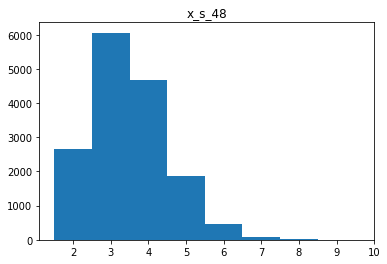

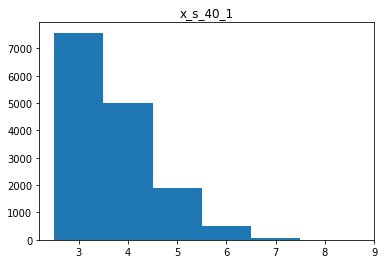

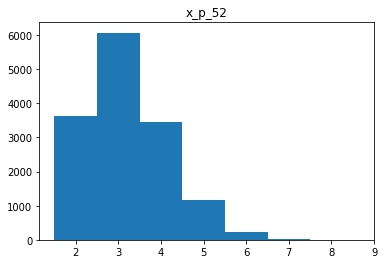

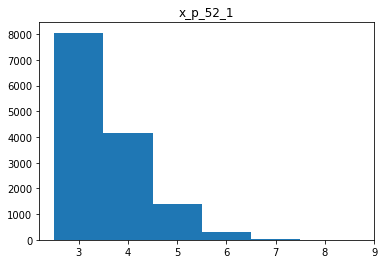

In [43]:
x_s_48 = np.asarray(prb_21_spanish_48[1])
x_s_40_1 = np.asarray(prb_21_spanish_40_1[1])
x_p_52 = np.asarray(prb_21_poker[1])
x_p_52_1 = np.asarray(prb_21_poker_1[1])


#histograma baraja española
bin1= np.arange(x_s_48.min(), x_s_48.max() + 1.5) - 0.5

f1 = plt.figure()

ax1 = f1.add_subplot(111)
ax1.hist(x_s_48, bins = bin1)
ax1.set_xticks(bin1+ 0.5)
ax1.set_title('x_s_48')

#histograma baraja española modificada
bin2= np.arange(x_s_40_1.min(), x_s_40_1.max() + 1.5) - 0.5

f2 = plt.figure()

ax2 = f2.add_subplot(111)
ax2.hist(x_s_40_1, bins = bin2)
ax2.set_xticks(bin2+ 0.5)
ax2.set_title('x_s_40_1')

#histograma baraja poker
bin3 = np.arange(x_p_52.min(), x_p_52.max() + 1.5) - 0.5

f3 = plt.figure()

ax3 = f3.add_subplot(111)
ax3.hist(x_p_52, bins = bin3)
ax3.set_xticks(bin3+ 0.5)
ax3.set_title('x_p_52')

#histograma baraja poker modificada
bin4 = np.arange(x_p_52_1.min(), x_p_52_1.max() + 1.5) - 0.5

f4 = plt.figure()

ax4 = f4.add_subplot(111)
ax4.hist(x_p_52_1, bins = bin4)
ax4.set_xticks(bin4+ 0.5)
ax4.set_title('x_p_52_1')

# Punto 3

In [84]:
#histograma baraja española 48 modificada, sin [7,7,5]
spanish_deck_48_m = [1,2,3,4,5,6,10,11,12,1,2,3,4,5,6,8,9,10,11,12,1,2,3,4,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]

#histograma baraja poker modificada sin [7,7,5]
poker_deck_52_m = [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,8,9,10,11,12,13,1,2,3,4,5,6,8,9,10,11,12,13,1,2,3,4,6,7,8,9,10,11,12,13]

#elije aleatoreamente la mitad de un baraja completa "deck", sin la posibilidad de sacar las cartas en la mano "act"
def half_deck(deck, act):
    x = (len(deck) + len(act)) // 2
    h_deck = []

    for k in range(x):
        h_deck.append(deck[r.randint(0, len(deck) - 1)])

    return h_deck

#calcula las probabilidades con la mitad de la baraja y las cartas en la mano
prb_21_spanish_48_m = prob_21_s(half_deck(spanish_deck_48_m, [7,7,5]), n, current)
prb_21_poker_52_m = prob_21_s(half_deck(poker_deck_52_m, [7,7,5]), n, current)

print("half deck spanish prob:", prb_21_spanish_48_m[0], "de", n, "=", prb_21_spanish_48_m[0] / n)
print("half deck poker prob  :", prb_21_poker_52_m[0], "de", n, "=", prb_21_poker_52_m[0] / n)

half deck spanish prob: 9157 de 100000 = 0.09157
half deck poker prob  : 3898 de 100000 = 0.03898


Text(0.5, 1.0, 'x_p_52_m')

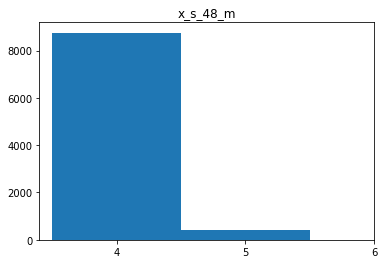

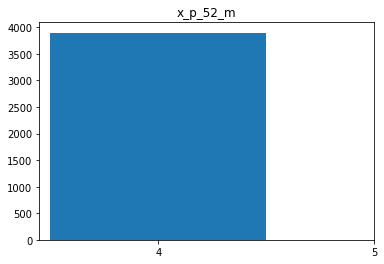

In [86]:
x_s_48_m = np.asarray(prb_21_spanish_48_m[1])
x_p_52_m = np.asarray(prb_21_poker_52_m[1])

#historgrama baraja española modificada sin [7,7,5]
bin5 = np.arange(x_s_48_m.min(), x_s_48_m.max() + 1.5) - 0.5

f5 = plt.figure()

ax5 = f5.add_subplot(111)
ax5.hist(x_s_48_m, bins = bin5)
ax5.set_xticks(bin5 + 0.5)
ax5.set_title('x_s_48_m')

#historgrama baraja poker modificada sin [7,7,5]
bin6 = np.arange(x_p_52_m.min(), x_p_52_m.max() + 1.5) - 0.5

f6 = plt.figure()

ax6 = f6.add_subplot(111)
ax6.hist(x_p_52_m, bins = bin6)
ax6.set_xticks(bin6 + 0.5)
ax6.set_title('x_p_52_m')

# Punto 4

A hotdeck has 4 ones, 4 twos and 2 other random cards.

Then:
*   4/10 * 3/9 probability to get a one.
*   4/10 probability to get a two. 

The probability to get 21 is 4/10 * 3/9 + 4/10.

The probability to get 21 with a cold deck is 0

In [89]:
print("analytic prob:",4/10 * 3/9 + 4/10)

analytic prob: 0.5333333333333334


In [88]:
#cartas en la mano
current = [7,7,5]

#mejor baraja posible de 8 cartas
hotdeck = [1,2,1,2,1,2,1,2,3,4]

#la peor baraja, es cualquier baraja que no contenga 1 o 2
coldeck = list(np.random.randint(3, max(poker_deck_52) + 1, size = 8))

#numero de intentos
n = 100000

prb_hd = prob_21_s(hotdeck, n, current)
prb_cd = prob_21_s(coldeck, n, current)

print("hotdeck probability:", prb_hd[0] / n)
print("colddeck probability:", prb_cd[0] / n)

hotdeck probability: 0.5349
colddeck probability: 0.0


Text(0.5, 1.0, 'coldeck')

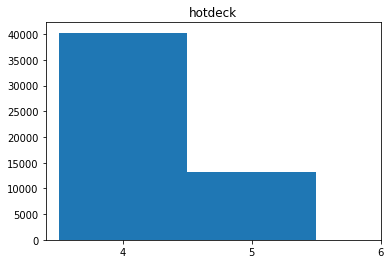

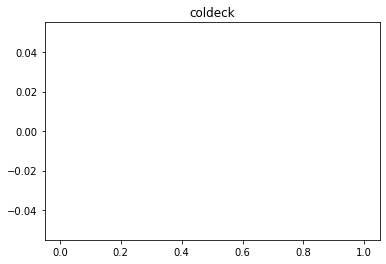

In [90]:
hd = np.asarray(prb_hd[1])
cd = np.asarray(prb_cd[1])

#histograma mejor baraja
bin7 = np.arange(hd.min(), hd.max() + 1.5) - 0.5

f7 = plt.figure()

ax7 = f7.add_subplot(111)
ax7.hist(hd, bins = bin7)
ax7.set_xticks(bin7 + 0.5)
ax7.set_title('hotdeck')

#histograma peor baraja
#bins8 = np.arange(cd.min(), cd.max() + 1.5) - 0.5

f8 = plt.figure()

ax8 = f8.add_subplot(111)
ax8.hist(cd)
# ax8.set_xticks(bins + 0.5)
ax8.set_title('coldeck')